In [ ]:
# Used Car Price Analysis
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [ ]:
# Load Data
# .data to csv conversion
df = pd.read_csv('data.csv')

df = df.iloc[: , 1:]

df.head()

,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
0,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
3,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
4,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250


In [ ]:
# Add Column Headers to csv file
cols = [
    "symboling", "normalized-losses", "make", "fuel-type", "aspiration",
    "num-of-doors", "body-style", "drive-wheels", "engine-location",
    "wheel-base", "length", "width", "height", "curb-weight",
    "engine-type", "num-of-cylinders", "engine-size", "fuel-system",
    "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm",
    "city-mpg", "highway-mpg", "price"
]

df = pd.read_csv(
    "data.csv",            
    header=None,           
    names=cols,            
    skipinitialspace=True  
    # index_col=False      
)

print(df.head())
print(df.shape)


   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio hor

In [ ]:
# check for missing value, NaN, null
data = df

data.isna().any()

data.isnull().any()

symboling            False
normalized-losses    False
make                 False
fuel-type            False
aspiration           False
num-of-doors         False
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                 False
stroke               False
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg             False
highway-mpg          False
price                False
dtype: bool

In [ ]:
# Formula L/100lm = 235 /MPG
# Convert mpg to L/100km
data['city-mpg'] = 235 / df['city-mpg']
data.rename(columns = {'city_mpg': "city-L / 100km"}, inplace = True)

print(data.columns)

data.dtypes

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')


symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg             float64
highway-mpg            int64
price                 object
dtype: object

In [ ]:
# remove price value ?
# Covert Price Column from object to int
data.price.unique()

data = data[data.price != '?']

data['price'] = data['price'].astype(int)

data.dtypes

C:\Users\raymo\AppData\Local\Temp\ipykernel_32584\4167990282.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price'] = data['price'].astype(int)


symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg             float64
highway-mpg            int64
price                  int32
dtype: object

0         Low
1         Low
2         Low
3         Low
4         Low
        ...  
200       Low
201    Medium
202    Medium
203    Medium
204    Medium
Name: price-binned, Length: 201, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']


C:\Users\raymo\AppData\Local\Temp\ipykernel_32584\1031387465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['length'] = data['length']/data['length'].max()
C:\Users\raymo\AppData\Local\Temp\ipykernel_32584\1031387465.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['width'] = data['width']/data['width'].max()
C:\Users\raymo\AppData\Local\Temp\ipykernel_32584\1031387465.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

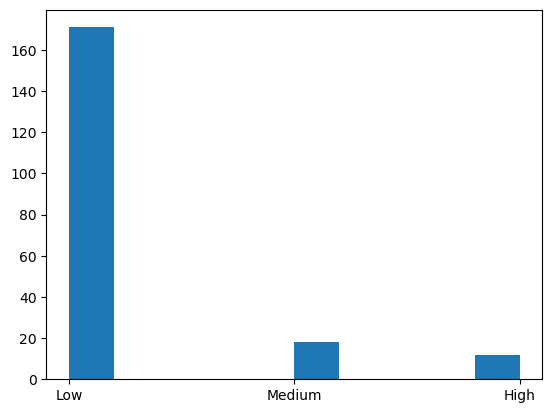

In [ ]:
# Normalize Car Price for comparison
# Divide into three catagories: low, medium, high
data['length'] = data['length']/data['length'].max()
data['width'] = data['width']/data['width'].max()
data['height'] = data['height']/data['height'].max()

# binning- grouping values
bins = np.linspace(min(data['price']), max(data['price']), 4) 
group_names = ['Low', 'Medium', 'High']
data['price-binned'] = pd.cut(data['price'], bins, 
                              labels = group_names, 
                              include_lowest = True)

print(data['price-binned'])
plt.hist(data['price-binned'])
plt.show()

In [ ]:
# use one-hot encoding convert object type to numerical 
pd.get_dummies(data['fuel-type']).head()

data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,10.164279,9.944145,30.686567,13207.129353
std,1.254802,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,4.004965,2.534599,6.815150,7947.066342
min,-2.000000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,7.000000,4.795918,16.000000,5118.000000
25%,0.000000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,8.600000,7.833333,25.000000,7775.000000
50%,1.000000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,9.000000,9.791667,30.000000,10295.000000
75%,2.000000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,9.400000,12.368421,34.000000,16500.000000
max,3.000000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,23.000000,18.076923,54.000000,45400.000000


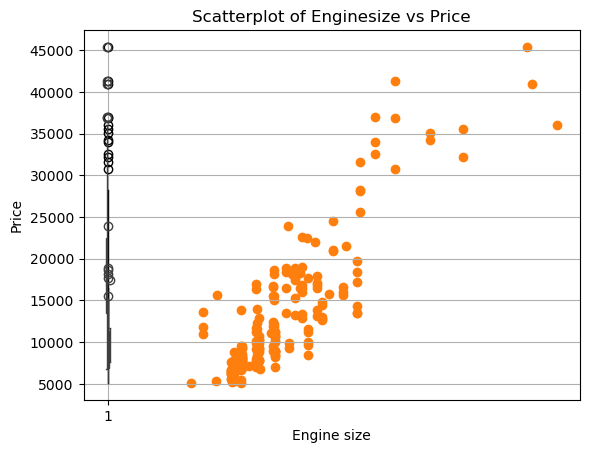

In [ ]:
# box plot & scatter plot
plt.boxplot(data['price'])

sns.boxplot(x ='drive-wheels', y ='price', data = data)

plt.scatter(data['engine-size'], data['price'])
plt.title('Scatterplot of Enginesize vs Price')
plt.xlabel('Engine size')
plt.ylabel('Price')
plt.grid()
plt.show()

In [ ]:
# Grouping data by attribute of drive-wheels & body-style
test = data[['drive-wheels', 'body-style', 'price']]
data_grp = test.groupby(['drive-wheels', 'body-style'], 
                         as_index = False).mean()

data_grp

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


C:\Users\raymo\AppData\Local\Temp\ipykernel_32584\2322865844.py:6: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar()


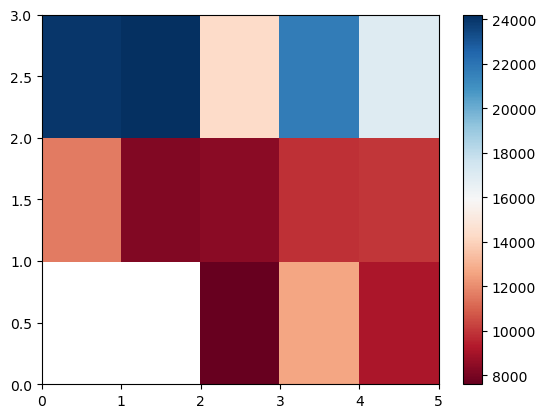

In [ ]:
# Heat map
data_pivot = data_grp.pivot(index = 'drive-wheels',
                            columns = 'body-style')
data_pivot

plt.pcolor(data_pivot, cmap ='RdBu')
plt.colorbar()
plt.show()

In the RdBu colormap, dark blue = higher values, dark red = lower values.
From the heatmap, rear-wheel drive (rwd) and 4-wheel drive (4wd) combinations with certain body styles (like sedan or coupe) appear bluer, meaning they have higher average prices.
Meanwhile, front-wheel drive (fwd) combinations with hatchbacks or wagons appear redder, showing lower average prices — suggesting that drive type and body style jointly influence car pricing.

F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)


C:\Users\raymo\AppData\Local\Temp\ipykernel_32584\3409321735.py:4: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  grouped_annova.get_group('honda')['price'],
C:\Users\raymo\AppData\Local\Temp\ipykernel_32584\3409321735.py:5: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  grouped_annova.get_group('subaru')['price']


(0.0, 53360.29343543138)

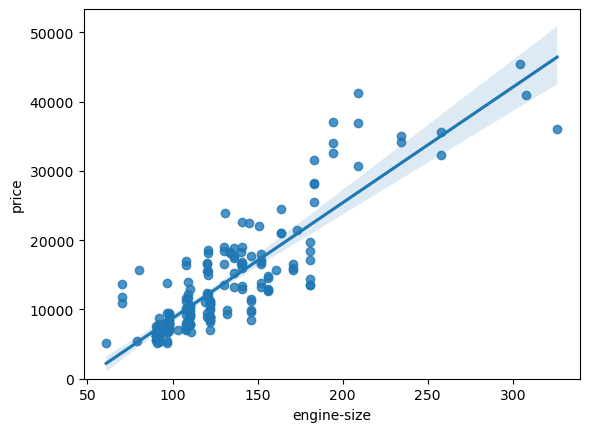

In [ ]:
# The Analysis of Variance (ANOVA) test 
data_annova = data[['make', 'price']]
grouped_annova = data_annova.groupby(['make'])
annova_results_l = sp.stats.f_oneway(
                             grouped_annova.get_group('honda')['price'],
                             grouped_annova.get_group('subaru')['price']
                                    )
print(annova_results_l)

sns.regplot(x ='engine-size', y ='price', data = data)
plt.ylim(0, )

From the graph, there’s a clear positive correlation — as engine size increases, car price also tends to increase.
The blue regression line confirms this upward trend, while the shaded area represents the confidence interval, showing that larger engines are generally associated with higher prices but with some variability.